In [75]:
from importlib import reload

import myutman
reload(myutman.stand_utils)
reload(myutman.stand)
reload(myutman.window_algo)
reload(myutman.generation)
reload(myutman.fuse)

from myutman.fuse import FuseForWindowAlgo
from myutman.generation import ClientTerminalsReorderSampleGeneration, ChangeWithClientSampleGeneration, \
    ChangeWithTerminalSampleGeneration, ChangeSampleGeneration, StillSampleGeneration, \
    SimpleMultichangeSampleGeneration
from myutman.node_distribution import RoundrobinNodeDistribution, DependentNodeDistribution, \
    SecondMetaDependentNodeDistribution
from myutman.stand import Stand
from myutman.stand_utils import compare_vals, show_boxplots, show_plot_by_p_levels, show_boxplots_by_p_levels
from myutman.window_algo import WindowStreamingAlgo

import json

In [11]:
big_windows = [(100, 100), (150, 150), (200, 200)]
small_windows = lambda n_nodes: [(a // n_nodes, b // n_nodes) for a, b in big_windows]

n_nodes = 5
stand_centralized = lambda n_nodes: Stand(
    n_nodes=1,
    algo=WindowStreamingAlgo,
    client_node_distribution=RoundrobinNodeDistribution,
    terminal_node_distribution=RoundrobinNodeDistribution,
    fuse=FuseForWindowAlgo(),
    client_algo_kwargs={"window_sizes": big_windows},
    terminal_algo_kwargs={"window_sizes": big_windows}
)
stand_roundrobins = lambda n_nodes: Stand(
    n_nodes=n_nodes,
    algo=WindowStreamingAlgo,
    client_node_distribution=RoundrobinNodeDistribution,
    terminal_node_distribution=RoundrobinNodeDistribution,
    fuse=FuseForWindowAlgo(),
    client_algo_kwargs={"window_sizes": small_windows(n_nodes)},
    terminal_algo_kwargs={"window_sizes": small_windows(n_nodes)}
)
stand_client_dependent = lambda n_nodes: Stand(
    n_nodes=n_nodes,
    algo=WindowStreamingAlgo,
    client_node_distribution=DependentNodeDistribution,
    terminal_node_distribution=SecondMetaDependentNodeDistribution,
    fuse=FuseForWindowAlgo(),
    client_algo_kwargs={"window_sizes": big_windows},
    terminal_algo_kwargs={"window_sizes": small_windows(n_nodes)}
)
stand_terminal_dependent = lambda n_nodes: Stand(
    n_nodes=n_nodes,
    algo=WindowStreamingAlgo,
    client_node_distribution=SecondMetaDependentNodeDistribution,
    terminal_node_distribution=DependentNodeDistribution,
    fuse=FuseForWindowAlgo(),
    client_algo_kwargs={"window_sizes": small_windows(n_nodes)},
    terminal_algo_kwargs={"window_sizes": big_windows}
)
"""stand_resharding = Stand(
    n_nodes=n_nodes,
    algo=WindowStreamingAlgo,
    client_node_distribution=DependentNodeDistribution,
    terminal_node_distribution=DependentNodeDistribution,
    fuse=FuseForWindowAlgo()
)"""

'stand_resharding = Stand(\n    n_nodes=n_nodes,\n    algo=WindowStreamingAlgo,\n    client_node_distribution=DependentNodeDistribution,\n    terminal_node_distribution=DependentNodeDistribution,\n    fuse=FuseForWindowAlgo()\n)'

In [13]:
generations = [
    ChangeSampleGeneration
]

n_clients = 5
n_terminals = 5

stands = [
    stand_centralized(1),
    stand_roundrobins(4),
    stand_roundrobins(8),
    stand_roundrobins(16)
    #stand_client_dependent,
    #stand_terminal_dependent
]

results = [[[] for _ in stands] for _ in generations]
for state in range(10):
    for i, generation in enumerate(generations):
        sample, change_points, change_points_ids = generation(state=state)(
            size=101000, 
            n_clients=n_clients,
            n_terminals=n_terminals,
            change_period=1000,
            change_period_noise=0,
            change_interval=1000
        )
        for j, stand in enumerate(stands):
            result1 = stand.test(
                p=0.05,
                sample=sample,
                change_points=change_points,
                change_ids=change_points_ids,
                n_clients=n_clients,
                n_terminals=n_terminals
            )
            print(result1)
            results[i][j].append(result1)
            #with open('tuned_sizes_results.json', 'w') as output_file:
            #    json.dump(results, output_file, indent=4, ensure_ascii=False)


Result written to outputs/algo=WindowStreamingAlgo_client_dist=RoundrobinNodeDistribution_terminal_dist=RoundrobinNodeDistribution_nnodes=1_1583417305.207329.json
{'client_TDR': 0.98, 'client_MDR': 0.020000000000000018, 'client_FDR': 0.4024390243902439, 'client_CDR': 2.6, 'terminal_TDR': 0.88, 'terminal_MDR': 0.12, 'terminal_FDR': 0.5111111111111111, 'terminal_CDR': 4.3, 'client_False': 33, 'terminal_False': 46, 'client_latency': 134.55102040816325, 'terminal_latency': 314.3636363636364}



Result written to outputs/algo=WindowStreamingAlgo_client_dist=RoundrobinNodeDistribution_terminal_dist=RoundrobinNodeDistribution_nnodes=4_1583417858.765988.json
{'client_TDR': 0.96, 'client_MDR': 0.040000000000000036, 'client_FDR': 0.4725274725274725, 'client_CDR': 2.2, 'terminal_TDR': 0.98, 'terminal_MDR': 0.020000000000000018, 'terminal_FDR': 0.4842105263157894, 'terminal_CDR': 3.38, 'client_False': 43, 'terminal_False': 46, 'client_latency': 214.20833333333334, 'terminal_latency': 294.3469387755102}



Result written to outputs/algo=WindowStreamingAlgo_client_dist=RoundrobinNodeDistribution_terminal_dist=RoundrobinNodeDistribution_nnodes=8_1583418387.391069.json
{'client_TDR': 0.98, 'client_MDR': 0.020000000000000018, 'client_FDR': 0.43023255813953487, 'client_CDR': 1.58, 'terminal_TDR': 0.98, 'terminal_MDR': 0.020000000000000018, 'terminal_FDR': 0.48958333333333337, 'terminal_CDR': 2.42, 'client_False': 37, 'terminal_False': 47, 'client_latency': 170.69387755102042, 'terminal_latency': 283.57142857142856}



Result written to outputs/algo=WindowStreamingAlgo_client_dist=RoundrobinNodeDistribution_terminal_dist=RoundrobinNodeDistribution_nnodes=16_1583418879.116514.json
{'client_TDR': 0.98, 'client_MDR': 0.020000000000000018, 'client_FDR': 0.30000000000000004, 'client_CDR': 1.0, 'terminal_TDR': 0.96, 'terminal_MDR': 0.040000000000000036, 'terminal_FDR': 0.41463414634146345, 'terminal_CDR': 1.98, 'client_False': 21, 'terminal_False': 34, 'client_latency': 214.16326530612244, 'terminal_latency': 286.3958333333333}



Result written to outputs/algo=WindowStreamingAlgo_client_dist=RoundrobinNodeDistribution_terminal_dist=RoundrobinNodeDistribution_nnodes=1_1583423468.730915.json
{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.36708860759493667, 'client_CDR': 2.62, 'terminal_TDR': 0.94, 'terminal_MDR': 0.06000000000000005, 'terminal_FDR': 0.3648648648648649, 'terminal_CDR': 4.06, 'client_False': 29, 'terminal_False': 27, 'client_latency': 191.36, 'terminal_latency': 398.63829787234044}



Result written to outputs/algo=WindowStreamingAlgo_client_dist=RoundrobinNodeDistribution_terminal_dist=RoundrobinNodeDistribution_nnodes=4_1583427339.937415.json
{'client_TDR': 0.98, 'client_MDR': 0.020000000000000018, 'client_FDR': 0.449438202247191, 'client_CDR': 1.68, 'terminal_TDR': 0.96, 'terminal_MDR': 0.040000000000000036, 'terminal_FDR': 0.5102040816326531, 'terminal_CDR': 3.32, 'client_False': 40, 'terminal_False': 50, 'client_latency': 203.6734693877551, 'terminal_latency': 256.8333333333333}



Result written to outputs/algo=WindowStreamingAlgo_client_dist=RoundrobinNodeDistribution_terminal_dist=RoundrobinNodeDistribution_nnodes=8_1583429966.962401.json
{'client_TDR': 0.96, 'client_MDR': 0.040000000000000036, 'client_FDR': 0.43529411764705883, 'client_CDR': 1.44, 'terminal_TDR': 0.96, 'terminal_MDR': 0.040000000000000036, 'terminal_FDR': 0.4482758620689655, 'terminal_CDR': 2.28, 'client_False': 37, 'terminal_False': 39, 'client_latency': 178.125, 'terminal_latency': 249.45833333333334}



Result written to outputs/algo=WindowStreamingAlgo_client_dist=RoundrobinNodeDistribution_terminal_dist=RoundrobinNodeDistribution_nnodes=16_1583430398.067826.json
{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.40476190476190477, 'client_CDR': 0.8, 'terminal_TDR': 1.0, 'terminal_MDR': 0.0, 'terminal_FDR': 0.36708860759493667, 'terminal_CDR': 1.78, 'client_False': 34, 'terminal_False': 29, 'client_latency': 218.88, 'terminal_latency': 265.6}



Result written to outputs/algo=WindowStreamingAlgo_client_dist=RoundrobinNodeDistribution_terminal_dist=RoundrobinNodeDistribution_nnodes=1_1583432150.722889.json
{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.35064935064935066, 'client_CDR': 2.18, 'terminal_TDR': 0.88, 'terminal_MDR': 0.12, 'terminal_FDR': 0.47619047619047616, 'terminal_CDR': 4.06, 'client_False': 27, 'terminal_False': 40, 'client_latency': 149.5, 'terminal_latency': 338.1818181818182}



Result written to outputs/algo=WindowStreamingAlgo_client_dist=RoundrobinNodeDistribution_terminal_dist=RoundrobinNodeDistribution_nnodes=4_1583432741.388034.json
{'client_TDR': 1.0, 'client_MDR': 0.0, 'client_FDR': 0.41860465116279066, 'client_CDR': 1.66, 'terminal_TDR': 0.92, 'terminal_MDR': 0.07999999999999996, 'terminal_FDR': 0.45882352941176474, 'terminal_CDR': 3.14, 'client_False': 36, 'terminal_False': 39, 'client_latency': 157.74, 'terminal_latency': 256.9782608695652}


KeyboardInterrupt: 

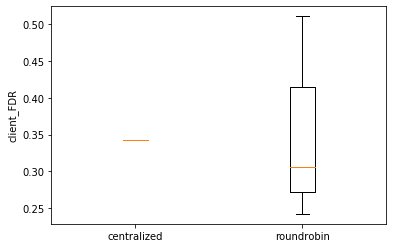

In [7]:
show_boxplots('client_FDR', [results[0][0], results[0][1]], ['centralized', 'roundrobin'])

In [ ]:
show_boxplots('client_MDR', results[0], ['centralized', 'roundrobin', 'client_dependent', 'terminal_dependent'])

In [ ]:
show_boxplots('client_FDR', results[0], ['centralized', 'roundrobin', 'client_dependent', 'terminal_dependent'])

In [ ]:
show_boxplots('terminal_MDR', results[0], ['centralized', 'roundrobin', 'client_dependent', 'terminal_dependent'])

In [ ]:
show_boxplots('terminal_FDR', results[0], ['centralized', 'roundrobin', 'client_dependent', 'terminal_dependent'])

In [ ]:
show_boxplots('client_latency', results[0], ['centralized', 'roundrobin', 'client_dependent', 'terminal_dependent'])

In [ ]:
show_boxplots('terminal_latency', results[0], ['centralized', 'roundrobin', 'client_dependent', 'terminal_dependent'])

In [ ]:
stands = [
    stand_centralized,
    stand_roundrobins,
    stand_client_dependent,
]

generations = [
    SimpleMultichangeSampleGeneration
]

n_clients = 1
n_terminals = 1

results = [[[] for _ in stands] for _ in generations]
for state in range(1):
    for i, generation in enumerate(generations):
        sample, change_points, change_points_ids = generation(state=state)(
            size=10000,
            tau=200
        )
        for j, stand in enumerate(stands):
            result1 = stand.test(
                p=0.05,
                sample=sample,
                change_points=change_points,
                change_ids=change_points_ids,
                n_clients=n_clients,
                n_terminals=n_terminals
            )
            print(result1)
            results[i][j].append(result1)

In [ ]:
show_boxplots('client_MDR', results[0], ['centralized', 'roundrobin', 'client_dependent'])

In [ ]:
show_boxplots('client_FDR', results[0], ['centralized', 'roundrobin', 'client_dependent'])

In [ ]:
show_boxplots('client_latency', results[0], ['centralized', 'roundrobin', 'client_dependent'])

In [77]:
with open('centralized_vs_roundrobin_v2_p=[0.01, 0.05, 0.1]_nnodes=[4, 8, 16]_original_experiments.json') as input_file:
    results = json.load(input_file)

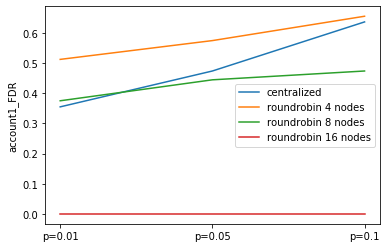

In [78]:
show_plot_by_p_levels('account1_FDR', results[0], ['centralized', 'roundrobin 4 nodes', 'roundrobin 8 nodes', 'roundrobin 16 nodes'])

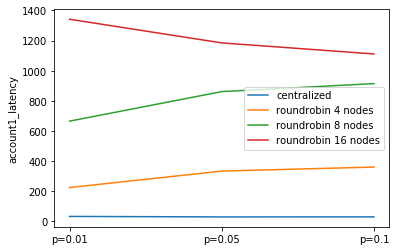

In [79]:
show_plot_by_p_levels('account1_latency', results[0], ['centralized', 'roundrobin 4 nodes', 'roundrobin 8 nodes', 'roundrobin 16 nodes'])

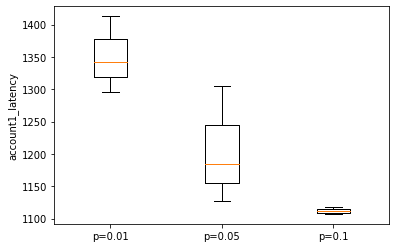

In [80]:
show_boxplots('account1_latency', results[0][3], ['p=0.01', 'p=0.05', 'p=0.1'])

(3, 4, 3)
(4, 3)
(4, 3)
(4, 3)


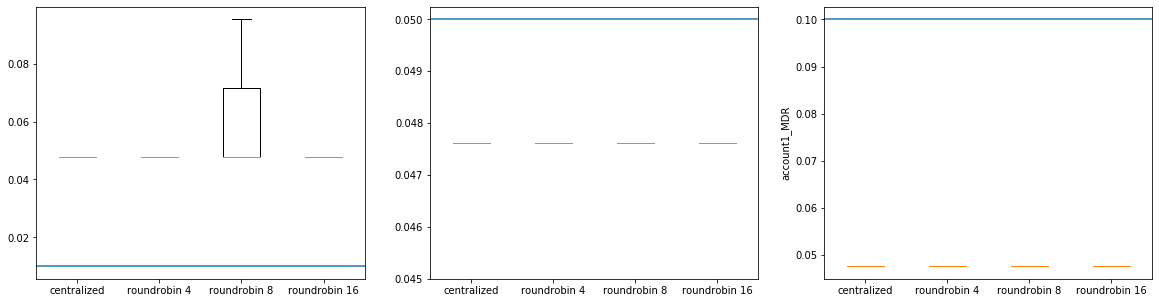

In [81]:
show_boxplots_by_p_levels('account1_MDR', results[0], ['centralized', 'roundrobin 4', 'roundrobin 8', 'roundrobin 16'])